# Pyber Analysis

* From the first glance, it is clear that the most amount of drivers and rides is located in the urban area. Given that urban population is more concentrated, this creates a higher competition for the fare rate, and inevitably, an urban fare is the lowest comparing to the suburban and rural areas. 


* Fares in the suburban area are higher, and there are fewer rides in comparison with the urban area.


* An amount of rides in the rural areas is the lowest compared to the rides in the urban area. Considering a small number of drivers in the rural area, rural drivers are charging the highest fares comparing to the fares in suburban and urban areas.

In [2]:
# Dependencies 
import csv 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read csv files
city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv')

In [4]:
# Combine both files based on common column "city"
rides_df = pd.merge(ride_df, city_df, how="left", on="city")


In [5]:
# Create data sets for urban, suburban, and rural rides
urban = rides_df[rides_df["type"] == "Urban"]
suburban = rides_df[rides_df["type"] == "Suburban"]
rural = rides_df[rides_df["type"] == "Rural"]


In [6]:
# Count average fare price, total rides, and total drivers in 3 areas
urban_avg_fare = urban.groupby('city').mean()['fare']
urban_ride_count = urban.groupby('city').count()['ride_id']
urban_driver_count = urban.groupby('city').count()['driver_count']

suburban_avg_fare = suburban.groupby('city').mean()['fare']
suburban_ride_count = suburban.groupby('city').count()['ride_id']
suburban_driver_count = suburban.groupby('city').count()['driver_count']

rural_avg_fare = rural.groupby('city').mean()['fare']
rural_ride_count = rural.groupby('city').count()['ride_id']
rural_driver_count = rural.groupby('city').count()['driver_count']

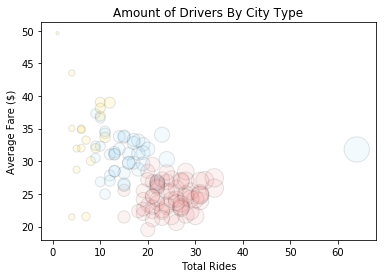

In [7]:
# Create scatter plots according to the urban, suburban, and rural areas
plt.scatter(urban_ride_count, urban_avg_fare, 
           s=10*urban_driver_count, marker='o',
           color='lightcoral' , edgecolor='black',
            linewidths=1, alpha=0.1, label='Urban')

plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count, marker='o',
            color='lightskyblue', edgecolor='black',
            linewidths=1, alpha=0.1, label='Suburban')

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, marker='o',
            color='gold', edgecolor='black',
            linewidths=1, alpha=0.1, label='Rural')

# Display plots
plt.title('Amount of Drivers By City Type')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Rides')
plt.show()

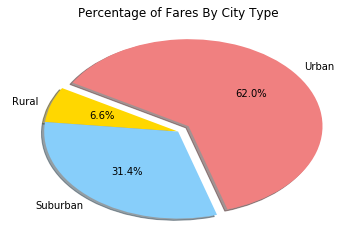

In [8]:
# Calculate the percentage of fares by city type - fares by areas / sum of all fares
percent_by_type = rides_df.groupby("type").sum()["fare"] / rides_df['fare'].sum() * 100


# Create pie chart 
plt.pie(percent_by_type, labels=["Rural", "Suburban", "Urban"],
           colors=["gold", "lightskyblue", "lightcoral"], autopct='%1.1f%%',
           explode=[0,0,0.1], shadow=True, startangle=150)

# Display the chart
plt.title('Percentage of Fares By City Type')
plt.show()